In [1]:
import rmtchem 
import timeit
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import imp
imp.reload(rmtchem)
plt.rcParams.update({'font.size': 16, 'pdf.fonttype':42,'text.usetex': False, 'font.family': 'serif'})

In [5]:
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import splu
n=5000
c=1.0
nr=int(c*n)
start=timeit.default_timer()
eta,nu,k,G=rmtchem.get_network(n,nr)
row,col=np.where(eta-nu!=0)
data=(eta-nu)[row,col]
A=csr_matrix((data,(row,col)),shape=(2*nr,n))
adj3=A.T.dot(A)
g=nx.convert_matrix.from_scipy_sparse_matrix(adj3)
lcc=np.array(list(max(nx.connected_components(g), key=len)))
# rk=np.linalg.matrix_rank(eta[::2,lcc]-nu[::2,lcc])
# ms=np.min(np.linalg.svd((eta[::2,lcc]-nu[::2,lcc]).T.dot((eta[::2,lcc]-nu[::2,lcc])),compute_uv=False))
stop=timeit.default_timer()
# start=timeit.default_timer()
# ms=np.min(np.linalg.svd((eta[::2,lcc]-nu[::2,lcc]).T.dot((eta[::2,lcc]-nu[::2,lcc])),compute_uv=False))
test=splu(adj3)
# stop=timeit.default_timer()
print(stop-start,len(lcc))


RuntimeError: Factor is exactly singular

In [20]:
np.linalg.det(adj3.toarray())

0.0

In [44]:
n=5000
c=2.5
seed=3
np.random.seed(seed)
nr=int(c*n)
start=timeit.default_timer()
eta,nu,k,G=rmtchem.get_network(n,nr)
row,col=np.where(eta[::2]-nu[::2]!=0)
data=(eta[::2]-nu[::2])[row,col]
A=csr_matrix((data,(row,col)),shape=(2*nr,n))
adj3=A.T.dot(A)
g=nx.convert_matrix.from_scipy_sparse_matrix(adj3)
lcc=np.array(list(max(nx.connected_components(g), key=len)))
sing=1-int(np.abs(np.linalg.det(adj3.toarray()))>1e-8)
stop=timeit.default_timer()

print(stop-start,len(lcc),int(sing))

7.737423671999977 5000 1


In the absence of driving, the steady state is determined by the free energies, Xs=np.exp(-G). In this case, the eigenvalues of the Jacobian are real and negative definite.

212


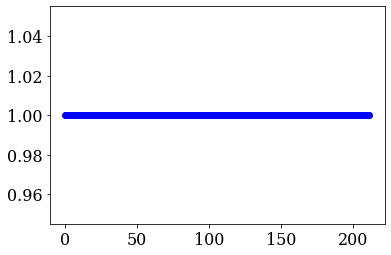

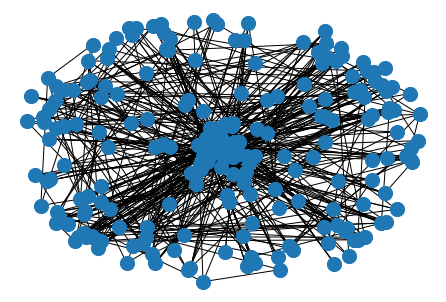

In [2]:
n=1000
c=0.1
nr=int(c*n)
seed=1

np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr)
adj=np.zeros((n,n))
for r in range(2*nr):
    reac=np.where(eta[r]>0)[0]
    prod=np.where(nu[r]>0)[0]
    for i in reac:
        for j in prod:
            adj[i,j]=1
        #if species are both reactants, they affect rates of change of each other
        for j in reac:
            adj[i,j]=1
g=nx.convert_matrix.from_numpy_matrix(adj)

lcc=np.array(list(max(nx.connected_components(g), key=len)))
n=len(lcc)
eta=eta[:,lcc]
nu=nu[:,lcc]
G=G[lcc]

print(n)
X0=np.exp(-G)
XD1=np.zeros(n)
XD2=np.zeros(n)
Xs2=rmtchem.steady(X0,eta,nu,k,XD1,XD2).x
plt.plot(Xs2/X0,'bo')
plt.show()

plt.show()
g=nx.from_numpy_matrix(rmtchem.jac(np.exp(-G),eta,nu,k,XD1,XD2))
nx.draw(g,node_size=200)
plt.savefig('plots/fig0b.pdf')
plt.show()
# Xs,success=rmtchem.integrate(X0,eta,nu,k,XD1,XD2,100,0.1,prog=True)
# plt.plot(Xs)
# plt.show()

156.32113481600004
[[1.0000e-03 1.0100e-02 2.4800e-02 3.9100e-02 6.6700e-02 1.3760e-01
  2.3540e-01 3.2180e-01 3.9150e-01 4.4050e-01 4.9620e-01]
 [2.0000e-04 3.3200e-03 6.5800e-03 1.8980e-02 5.2940e-02 1.3662e-01
  2.3260e-01 3.1344e-01 3.8712e-01 4.4658e-01 4.9702e-01]
 [1.0000e-04 1.7000e-03 3.6800e-03 9.9000e-03 3.8070e-02 1.3632e-01
  2.4290e-01 3.2285e-01 3.9291e-01 4.5119e-01 5.0183e-01]]


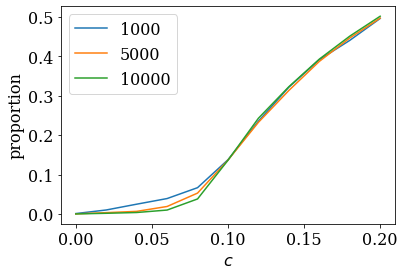

In [42]:
seeds=10

ns=[1000,5000,10000]
cs=0.02*np.arange(11)
start=timeit.default_timer()
vals1=[]
for n in ns:
    vals2=[]
    for c in cs:
        vals3=[]
        for seed in range(seeds):
            print(n,c,seed,end='\t\r',sep='\t')
            np.random.seed(1+seed)
            nr=int(c*n)
            eta,nu,k,G=rmtchem.get_network(n,nr)
            row,col=np.where(eta-nu!=0)
            data=(eta-nu)[row,col]
            A=csr_matrix((data,(row,col)),shape=(2*nr,n))
            adj3=A.T.dot(A)
            g=nx.convert_matrix.from_scipy_sparse_matrix(adj3)
            lcc=np.array(list(max(nx.connected_components(g), key=len)))
            vals3.append(len(lcc)/n)
        vals2.append(vals3)
    vals1.append(vals2)
    
stop=timeit.default_timer()
print(stop-start)
    
plots=np.mean(vals1,axis=2)
print(plots)
for i in range(len(plots)):
    plt.plot(cs,plots[i],label=ns[i])
plt.legend()
plt.xlabel(r'$c$')
plt.ylabel('proportion')
plt.show()

In [47]:
len(lcc)

5000

In [145]:
n=5000
c=1.0
nr=int(c*n)
start=timeit.default_timer()

eta,nu,k,G=rmtchem.get_network(n,nr)
row,col=np.where(eta[::2]-nu[::2]!=0)
data=(eta[::2]-nu[::2])[row,col]
A=csr_matrix((data,(row,col)),shape=(2*nr,n),dtype=int)
adj3=A.T.dot(A)
g=nx.convert_matrix.from_scipy_sparse_matrix(adj3)
lcc=np.array(list(max(nx.connected_components(g), key=len)))
stop=timeit.default_timer()
rank=np.linalg.matrix_rank(adj3.toarray()[np.ix_(lcc,lcc)])
stop2=timeit.default_timer()
print(stop-start,stop2-stop,len(lcc),len(lcc)-rank,sep='\t')

2.9585271989999455	19.85322342900008	-1648.2379131430002	4894	13


In [146]:
start=timeit.default_timer()
X0=np.exp(-G[lcc])
evals,evecs=np.linalg.eig(rmtchem.jac(X0,eta[:,lcc], nu[:,lcc], k, np.zeros(len(lcc)), np.zeros(len(lcc))))
rank2=len(np.where(np.abs(evals)<1e-8)[0])
stop=timeit.default_timer()
print(stop-start,rank2,sep='\t')

46.860490452999784	13


In [53]:
seeds=10
ns=[100,500,1000]
cs=0.01+0.02*np.arange(101)
start=timeit.default_timer()
vals1=[]
for n in ns:
    vals2=[]
    for c in cs:
        vals3=[]
        for seed in range(seeds):
            print("%i\t%.2f\t%i\t\r"%(n,c,seed),end='')
            np.random.seed(1+seed)
            nr=int(c*n)
            eta,nu,k,G=rmtchem.get_network(n,nr)
            row,col=np.where(eta-nu!=0)
            data=(eta-nu)[row,col]
            A=csr_matrix((data,(row,col)),shape=(2*nr,n))
            adj3=A.T.dot(A)
            g=nx.convert_matrix.from_scipy_sparse_matrix(adj3)
            lcc=np.array(list(max(nx.connected_components(g), key=len)))
            rank=np.linalg.matrix_rank(adj3.toarray()[np.ix_(lcc,lcc)])
            #The sparse svd may be prefarable to dense matrix_rank
            vals3.append([len(lcc)/n,sing])
        vals2.append(vals3)
    vals1.append(vals2)
vals1=np.array(vals1)
stop=timeit.default_timer()
print(stop-start)
    
plots=np.mean(vals1[:,:,:,0],axis=2)
print(plots)
for i in range(len(plots)):
    plt.plot(cs,plots[i],label=ns[i])
plt.legend()
plt.xlabel(r'$c$')
plt.ylabel('proportion')
plt.show()
                    
plots=np.mean(vals1[:,:,:,1],axis=2)
print(plots)
for i in range(len(plots)):
    plt.plot(cs,plots[i],label=ns[i])
plt.legend()
plt.xlabel(r'$c$')
plt.ylabel('proportion')
plt.show()

KeyboardInterrupt: 

In [54]:
n=5000
c=1.0
nr=int(c*n)
start=timeit.default_timer()
eta,nu,k,G=rmtchem.get_network(n,nr)
row,col=np.where(eta-nu!=0)
data=(eta-nu)[row,col]
A=csr_matrix((data,(row,col)),shape=(2*nr,n))
adj3=A.T.dot(A)
g=nx.convert_matrix.from_scipy_sparse_matrix(adj3)
lcc=np.array(list(max(nx.connected_components(g), key=len)))
rk=np.linalg.matrix_rank(eta[::2,lcc]-nu[::2,lcc])
stop=timeit.default_timer()
print(stop-start,rk,len(lcc))

KeyboardInterrupt: 

In [176]:
n=1000
c=1.5
seeds=50
seed0=1

ranks=[]
ns=[]
for iseed in range(seeds):
    print(iseed,flush=True,end='\t\r')
    np.random.seed(seed0+iseed)
    eta,nu,k,G=rmtchem.get_network(n,nr)
    g=nx.from_numpy_matrix(np.einsum("ki,kj->ij",(nu-eta)[::2],(eta-nu)[::2]))
    lcc=np.array(list(max(nx.connected_components(g), key=len)))
    ranks.append(np.linalg.matrix_rank(eta-nu))
    ns.append(len(lcc))
pos=np.where(np.array(ns)-np.array(ranks)>0)[0]
print(np.array(ns)[pos], np.array(ranks)[pos])

[997 998] [996 997]


[[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.6 0.4 0.3 0.2 0.2 0.2
  0.2 0.2 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.9 0.9 0.8 0.8 0.8
  0.7 0.6 0.5 0.4 0.4 0.3 0.2 0.2 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1

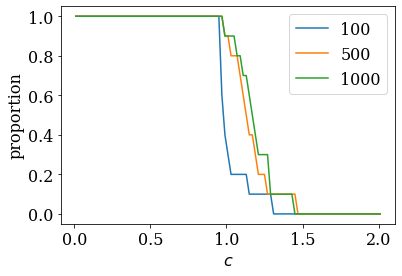

In [54]:
plots=np.mean(1-vals1[:,:,:,1],axis=2)
print(plots)
for i in range(len(plots)):
    plt.plot(cs,plots[i],label=ns[i])
plt.legend()
plt.xlabel(r'$c$')
plt.ylabel('proportion')
plt.show()

In [156]:
n=1000
c=1.5
nr=int(c*n)
seeds=20
seed0=10

ns=[]
zeros=[]
for iseed in range(seeds):
    np.random.seed(seed0+iseed)
    print(iseed,flush=True,end='\t\r')
    eta,nu,k,G=rmtchem.get_network(n,nr)
    mat2=np.einsum("k,ki,kj->ij",k[::2]*np.exp(-np.sum(nu[::2]*G,axis=1)),(nu-eta)[::2],(eta-nu)[::2]*np.exp(G))
    evals,evecs=np.linalg.eig(mat2)
    g=nx.from_numpy_matrix(mat2)
    lcc=np.array(list(max(nx.connected_components(g), key=len)))
    zeros.append(len(evals[np.where(np.real(evals)>-1e-8)[0]]))
    ns.append(n-len(lcc))

syms=np.where(np.array(zeros)-np.array(ns)>0)[0]
print(syms, np.array(ns)[syms], np.array(zeros)[syms])

[17] [3] [4]


In [127]:
np.random.seed(447)
eta,nu,k,G=rmtchem.get_network(n,nr)
mat2=np.einsum("k,ki,kj->ij",k[::2]*np.exp(-np.sum(nu[::2]*G,axis=1)),(nu-eta)[::2],(eta-nu)[::2]*np.exp(G))
evals,evecs=np.linalg.eig(mat2)
g=nx.from_numpy_matrix(mat2)
lcc=np.array(list(max(nx.connected_components(g), key=len)))
pos=np.where(np.real(evals)>-1e-8)[0]
pos2=np.where(np.abs(evecs[:,pos])>1e-8)
print(len(pos),n-len(lcc))
print(evals[pos],pos2)
print(evecs[pos2[0],pos])
print(evecs[pos2[0],pos]*np.exp(G[pos2[0]]))

1 0
[6.84042285e-14] (array([ 2, 38]), array([0, 0]))
[ 0.99220192 -0.12464088]
[ 0.17522484 -0.35044968]


-0.516052508271514


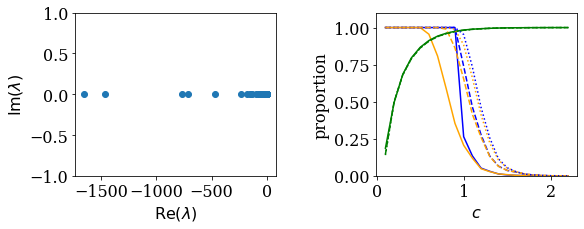

In [148]:
plt.subplots(1,2,figsize=(9,3))
plt.subplot(1,2,1)
n=50
nr=100
eta,nu,k,G=rmtchem.get_network(n,nr)
evals,evecs=np.linalg.eig(rmtchem.jac(np.exp(-G),eta,nu,k,XD1,XD2))
plt.xlabel('$\mathrm{Re}(\lambda)$')
plt.ylabel('$\mathrm{Im}(\lambda)$')
plt.ylim(-1,1)
plt.scatter(x=np.real(evals),y=np.imag(evals))
print(np.max(np.real(evals)))

plt.subplot(1,2,2)
n=200
ns=[100,500,1000]
ls=['-','--',':']
plt.xlabel('$c$')
plt.ylabel("proportion")
plt.ylim(0,1.1)
for i in range(3):
    n=ns[i]
    dat=np.loadtxt('data/sing/'+str(n)+'/scounts.txt')
    plt.plot(dat[:,1],dat[:,2],color='blue',linestyle=ls[i])
    plt.plot(dat[:,1],dat[:,3],color='orange',linestyle=ls[i])
    plt.plot(dat[:,1],dat[:,4]/n,color='green',linestyle=ls[i])
    

plt.subplots_adjust(wspace=0.5,hspace=0.0)

plt.savefig("plots/fig1.pdf",transparent=True)
plt.show()

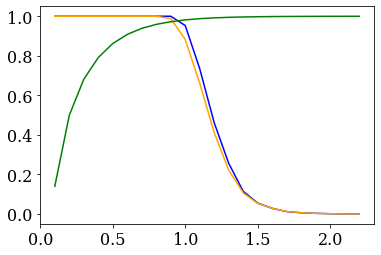

In [151]:
plt.plot(dat[:,1],dat[:,2],color='blue',linestyle=ls[0])
plt.plot(dat[:,1],dat[:,3],color='orange',linestyle=ls[0])
plt.plot(dat[:,1],dat[:,4]/n,color='green',linestyle=ls[0])
plt.show()

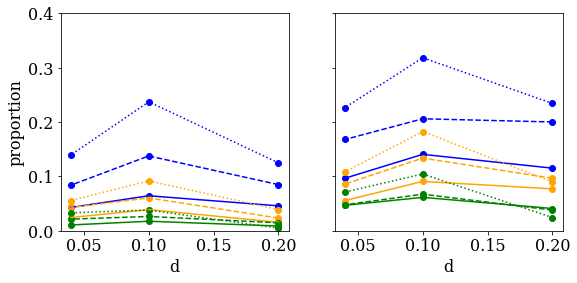

In [3]:
ns=[50,100,200]
ls=["-","--",":"]
cols=["blue","orange","green"]

plt.subplots(1,2,figsize=(9,4))
plt.subplot(1,2,1)
for nind in range(len(ns)):
    n=ns[nind]
    vals=np.loadtxt('data/'+str(n)+'_counts.txt')
    cs=np.unique(vals[:,1])
    for cind in range(len(cs)):
        c=cs[cind]
        inds=np.where(vals[:,1]==c)[0]
        order=np.argsort(vals[inds,2])
        plt.plot(1/vals[inds,2][order],vals[inds,7][order]/(vals[inds,6][order]+vals[inds,7][order]+vals[inds,8][order]),color=cols[cind],linestyle=ls[nind])
        plt.scatter(1/vals[inds,2][order],vals[inds,7][order]/(vals[inds,6][order]+vals[inds,7][order]+vals[inds,8][order]),color=cols[cind])
plt.ylabel('proportion')
plt.ylim(0,0.4)
plt.xlabel('d')

plt.subplot(1,2,2)
for nind in range(len(ns)):
    n=ns[nind]
    vals=np.loadtxt('data/'+str(n)+'_counts.txt')
    cs=np.unique(vals[:,1])
    for cind in range(len(cs)):
        c=cs[cind]
        inds=np.where(vals[:,1]==c)[0]
        order=np.argsort(vals[inds,2])
        plt.plot(1/vals[inds,2][order],vals[inds,8][order]/(vals[inds,6][order]+vals[inds,7][order]+vals[inds,8][order]),color=cols[cind],linestyle=ls[nind])
        plt.scatter(1/vals[inds,2][order],vals[inds,8][order]/(vals[inds,6][order]+vals[inds,7][order]+vals[inds,8][order]),color=cols[cind])
# plt.ylabel('proportion')
plt.ylim(0,0.4)
locs, labels = plt.yticks()
plt.yticks(locs,[])
plt.xlabel('d')

# plt.subplots_adjust(wspace=0.5,hspace=0.0)
plt.savefig('plots/fig4a.pdf')
plt.show()

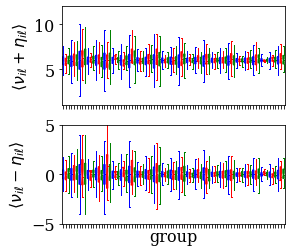

In [4]:
ns=[50,100,200]
cs=[2,2.5,3]
ds=[5,10,25]
c1='blue'
c2='red'
c3='green'


plt.subplots(2,1,figsize=(4,4))

plt.subplot(2,1,1)    
plt.ylim(1,12)
plt.tick_params(axis='x', which='both', bottom=True,  top=False, labelbottom=False) 
plots=[]
for n in ns:
    for c in cs:
        for d in ds:
            vals=np.loadtxt('data/'+str(n)+'_'+str(c)+'_'+str(d)+'.txt')
            plots.append((vals[np.where(vals[:,5]==0.)[0],9]+vals[np.where(vals[:,5]==0.)[0],10])/c)
            plots.append((vals[np.where(vals[:,5]==1.)[0],9]+vals[np.where(vals[:,5]==1.)[0],10])/c)
            plots.append((vals[np.where(vals[:,5]==2.)[0],9]+vals[np.where(vals[:,5]==2.)[0],10])/c)
            
# plt.xlabel('group')
plt.xticks([])
plt.ylabel(r'$\langle \nu_{i\ell}+\eta_{i\ell} \rangle$')
box1=plt.boxplot(plots,notch=True,patch_artist=True,showfliers=False)
for item in ['boxes', 'fliers', 'medians']:
    plt.setp(box1[item][0::3], color=c1)
    plt.setp(box1[item][1::3], color=c2)
    plt.setp(box1[item][2::3], color=c3)
for item in ['whiskers','caps']:
    plt.setp(box1[item][0::6], color=c1)
    plt.setp(box1[item][1::6], color=c1)
    plt.setp(box1[item][2::6], color=c2)
    plt.setp(box1[item][3::6], color=c2)
    plt.setp(box1[item][4::6], color=c3)
    plt.setp(box1[item][5::6], color=c3)
    
plt.subplot(2,1,2)
plt.ylim(-5,5)
plt.tick_params(axis='x', which='both', bottom=True,  top=False, labelbottom=False) 
plots=[]
for n in ns:
    for c in cs:
        for d in ds:
            vals=np.loadtxt('data/'+str(n)+'_'+str(c)+'_'+str(d)+'.txt')
            plots.append((vals[np.where(vals[:,5]==0.)[0],9]-vals[np.where(vals[:,5]==0.)[0],10])/c)
            plots.append((vals[np.where(vals[:,5]==1.)[0],9]-vals[np.where(vals[:,5]==1.)[0],10])/c)
            plots.append((vals[np.where(vals[:,5]==2.)[0],9]-vals[np.where(vals[:,5]==2.)[0],10])/c)
            
plt.xlabel('group')
plt.ylabel(r'$\langle \nu_{i\ell}-\eta_{i\ell} \rangle$')
box1=plt.boxplot(plots,notch=True,patch_artist=True,showfliers=False)
for item in ['boxes', 'fliers', 'medians']:
    plt.setp(box1[item][0::3], color=c1)
    plt.setp(box1[item][1::3], color=c2)
    plt.setp(box1[item][2::3], color=c3)
for item in ['whiskers','caps']:
    plt.setp(box1[item][0::6], color=c1)
    plt.setp(box1[item][1::6], color=c1)
    plt.setp(box1[item][2::6], color=c2)
    plt.setp(box1[item][3::6], color=c2)
    plt.setp(box1[item][4::6], color=c3)
    plt.setp(box1[item][5::6], color=c3)

plt.savefig('plots/fig4c.pdf')
plt.show()

In [5]:
from scipy.stats import ttest_ind,pearsonr

for n in ns:
    for c in cs:
        for d in ds:
            vals=np.loadtxt('data/'+str(n)+'_'+str(c)+'_'+str(d)+'.txt')
            x=vals[np.where(vals[:,5]==1.)[0],6]
            y=(vals[np.where(vals[:,5]==1.)[0],9]-vals[np.where(vals[:,5]==1.)[0],10])/c
            print(pearsonr(x,y))

(-0.003992963977621972, 0.978748991748521)
(-0.07632170922263574, 0.5424694091476423)
(-0.15352777004870677, 0.31974348203430647)
(-0.2957321060784049, 0.2661039565337719)
(-0.16012078000762997, 0.32365865833003893)
(-0.18496169185301692, 0.3760843528389307)
(-0.25409214474592484, 0.5094146948663432)
(0.1539422441293511, 0.5419369299471838)
(0.011850228989516529, 0.9724147044782732)
(0.34678186081490814, 0.0010000152295615056)
(0.056592589910772956, 0.505058101794877)
(-0.11995571432463052, 0.27127836548580847)
(-0.17529967840286545, 0.4126054336261221)
(0.06274172758736296, 0.6280646681266971)
(0.03236567924425168, 0.8347889183695314)
(0.15086105649475595, 0.5914876784496705)
(0.0768665200290676, 0.7031474338522247)
(-0.26842267495832256, 0.22710736994466282)
(-0.08843439947901274, 0.320879288077321)
(-0.014627605505906985, 0.8205340028301447)
(0.040054321454694786, 0.6348105809400345)
(-0.2140227172890236, 0.18480582774882448)
(-0.14953513641541413, 0.15029211897832856)
(-0.027201575

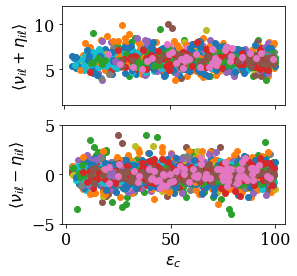

In [6]:
plt.subplots(2,1,figsize=(4,4))

plt.subplot(2,1,1)    
plt.tick_params(axis='x', which='both', bottom=True,  top=False, labelbottom=False) 
plt.ylabel(r'$\langle \nu_{i\ell}+\eta_{i\ell} \rangle$')
plt.ylim(1,12)
for n in ns:
    for c in cs:
        for d in ds:
            vals=np.loadtxt('data/'+str(n)+'_'+str(c)+'_'+str(d)+'.txt')
            plt.scatter(vals[np.where(vals[:,5]==1.)[0],6]*100/5000, (vals[np.where(vals[:,5]==1.)[0],9]+vals[np.where(vals[:,5]==1.)[0],10])/c)

plt.subplot(2,1,2)    
# plt.tick_params(axis='x', which='both', bottom=True,  top=False, labelbottom=False) 
plt.xlabel(r'$\epsilon_c$')
plt.ylabel(r'$\langle \nu_{i\ell}-\eta_{i\ell} \rangle$')
plt.ylim(-5,5)
for n in ns:
    for c in cs:
        for d in ds:
            vals=np.loadtxt('data/'+str(n)+'_'+str(c)+'_'+str(d)+'.txt')
            plt.scatter(vals[np.where(vals[:,5]==2.)[0],6]*100/5000, (vals[np.where(vals[:,5]==2.)[0],9]-vals[np.where(vals[:,5]==2.)[0],10])/c)
plt.savefig('plots/fig4b.pdf')
plt.show()


When we introduce small driving in the same network, the steady state is perturbed and some eigenvalues become complex. We can find the steady state with root finding, and the same steady state is found by numerical integration.

Adiabatically turning on driving then increasing driving amplitude, track the maximum eigenvalues

Saddle-node for iseed=1 around m=140 with 
inds=np.argsort(np.sum(eta+nu,axis=0))[-ndrives:]
n=100 c=2
seed0=1 numseeds=10 ndrives=3
steps=100 d0min=-1 d0max=3
steps2=200 dmin=1 dmax=20!

TODO: make this an quasistatic function, taking d0min, d0max, d1min, d1max

In [12]:
n=100
nr=200
nd=10
seed=49
np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr)
d0=1e3
d1min=1
d1max=100
steps=5000
XD1s,XD2s,nreacs,nprod,dG=rmtchem.get_drive(eta,nu,k,G,d0,d1min,d1max,steps,nd)
X0=np.exp(-G)
Xs,evals,bif=rmtchem.quasistatic(X0, eta, nu, k, XD1s, XD2s, output=True,stop=False)
m=np.where(np.max(np.real(evals),axis=1)>0)[0][0]
XD1=XD1s[m]*(1.05)
XD2=XD2s[m]
X2,success=rmtchem.integrate(Xs[m], eta, nu, k, XD1,XD2,40,0.1,prog=True)

Integration: 100%|##############################################| Time: 0:01:08


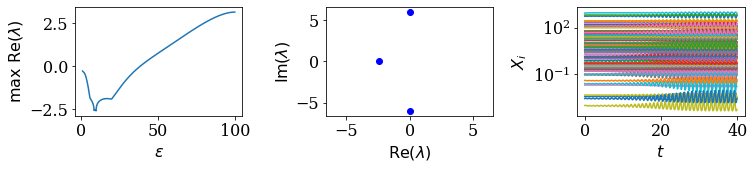

In [13]:
d1s=np.arange(d1min,d1max,(d1max-d1min)/steps)

plt.subplots(1,3,figsize=(12,2))
plt.subplot(1,3,1)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\mathrm{max}~\mathrm{Re}(\lambda)$')
plt.plot(d1s,np.max(np.real(evals),axis=1))

plt.subplot(1,3,2)
lim=1.1*np.max(np.abs(evals[m,np.argsort(np.real(evals[m]))[-3:]]))
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.ylabel(r'$\mathrm{Im}(\lambda)$')
plt.xlabel(r'$\mathrm{Re}(\lambda)$')
plt.plot(np.real(evals[m]),np.imag(evals[m]),'bo')

plt.subplot(1,3,3)
plt.yscale('log')
plt.ylabel('$X_i$')
plt.xlabel('$t$')
plt.plot(np.arange(0,40,0.1),X2)
plt.subplots_adjust(wspace=0.5,hspace=0.0)
plt.savefig('plots/fig2b.pdf')
plt.show()

saddle-node bifurcation!  4637


Integration: 100%|##############################################| Time: 0:00:09


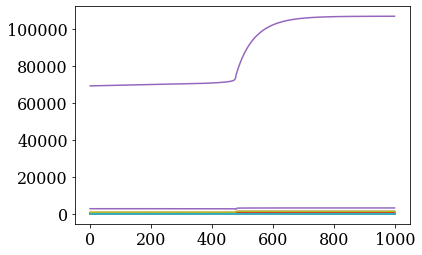

True
step size large (negative X0) 1175
step size large (negative X0) 1176
saddle-node bifurcation!  1177


In [14]:
n=100
nr=200
nd=10
seed=19
np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr)
d0=1e3
d1min=1
d1max=100
steps=10000
XD1s,XD2s,nreacs,nprod,dG=rmtchem.get_drive(eta,nu,k,G,d0,d1min,d1max,steps,nd)
X0=np.exp(-G)
Xs,evals,bif=rmtchem.quasistatic(X0, eta, nu, k, XD1s, XD2s, True)
m=len(Xs)-1
XD1=XD1s[m+1]
XD2=XD2s[m+1]
X2,success=rmtchem.integrate(Xs[-1]*(1+np.random.random(size=n)*1e-3), eta, nu, k, XD1,XD2,1000,1,prog=True)
plt.plot(X2)
plt.show()
sol=rmtchem.steady(X2[-1],eta, nu, k, XD1,XD2)
print(sol.success)
X2s,evals2,bif2=rmtchem.quasistatic(sol.x, eta, nu, k, np.flip(XD1s[:m+2],axis=0), np.flip(XD2s[:m+2],axis=0), True)
X3s,evals3,bif3=rmtchem.quasistatic(X2s[0], eta, nu, k, XD1s[m+1:], XD2s[m+1:], True)

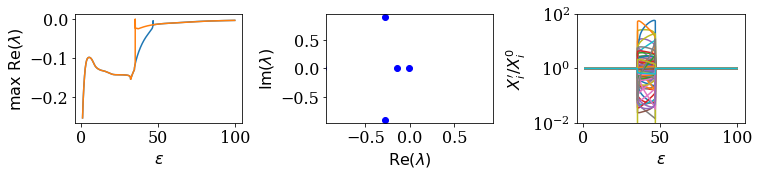

In [17]:
m2=len(X2s)-1
plt.subplots(1,3,figsize=(12,2))
plt.subplot(1,3,1)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\mathrm{max}~\mathrm{Re}(\lambda)$')
evals4=np.zeros(steps)
evals5=np.zeros(steps)
d1s=np.arange(d1min,d1max,(d1max-d1min)/steps)
evals4[:m+1]=np.max(np.real(evals),axis=1)
evals4[m+1:]=np.max(np.real(evals3),axis=1)
evals5[m+1:]=np.max(np.real(evals3),axis=1)
evals5[m-m2:m+1]=np.flip(np.max(np.real(evals2),axis=1),axis=0)
evals5[:m-m2]=np.max(np.real(evals),axis=1)[:m-m2]
plt.plot(d1s,evals4)
plt.plot(d1s,evals5)

plt.subplot(1,3,2)
lim=1.1*np.max(np.abs(evals[-1,np.argsort(np.real(evals[-1]))[-3:]]))
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.ylabel(r'$\mathrm{Im}(\lambda)$')
plt.xlabel(r'$\mathrm{Re}(\lambda)$')
plt.plot(np.real(evals[-2]),np.imag(evals[-2]),'bo')

plt.subplot(1,3,3)
plt.yscale('log')
plt.ylabel(r"$X_i'/X_i^0$")
plt.xlabel('$\epsilon$')
X4s=np.zeros((steps,n))
X5s=np.zeros((steps,n))
d1s=np.arange(d1min,d1max,(d1max-d1min)/steps)
X4s[:m+1]=Xs
X4s[m+1:]=X3s
X5s[m+1:]=X3s
X5s[m-m2:m+1]=np.flip(X2s,axis=0)
X5s[:m-m2]=Xs[:m-m2]
plt.yscale('log')
plt.ylim(0.01,100)
plt.plot(d1s,X5s/X4s)

plt.subplots_adjust(wspace=0.5,hspace=0.0)
plt.savefig('plots/fig2a.pdf')
plt.show()